# Определение стоимости автомобилей <a id="intro"></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Бэггинг.-RandomForestRegressor" data-toc-modified-id="Бэггинг.-RandomForestRegressor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Бэггинг. RandomForestRegressor</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Градиентный бустинг</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingHand---ручная-модель" data-toc-modified-id="GradientBoostingHand---ручная-модель-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>GradientBoostingHand - ручная модель</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание

В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. Модель будет встроена в мобильное приложения сервиса по продаже автомобилей с пробегом для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Значение метрики RMSE должно быть меньше 2500.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor, Dataset

import warnings
warnings.filterwarnings("ignore")

[В начало](#intro)

## Изучение данных

In [2]:
data = pd.read_csv("autos.csv")
data.head(2)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

В данных есть пропуски.

In [5]:
data[data.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Имеются дубликаты.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


Местами данные достаточно шумные, на первый взгляд также имеются аномалии.

**Выводы:**

На первый взгляд данные достаточно грязные. Что требуется:
- устранить неинформативные признаки;
- устранить пропуски и дубликаты;
- устранить аномалии.

[В начало](#intro)

# Предобработка данных

Для устранения неинформативных столбцов посмотрим на корреляция признаков с целевым признаком. Признаки, где корреляция отсутствует подлежат устранению.

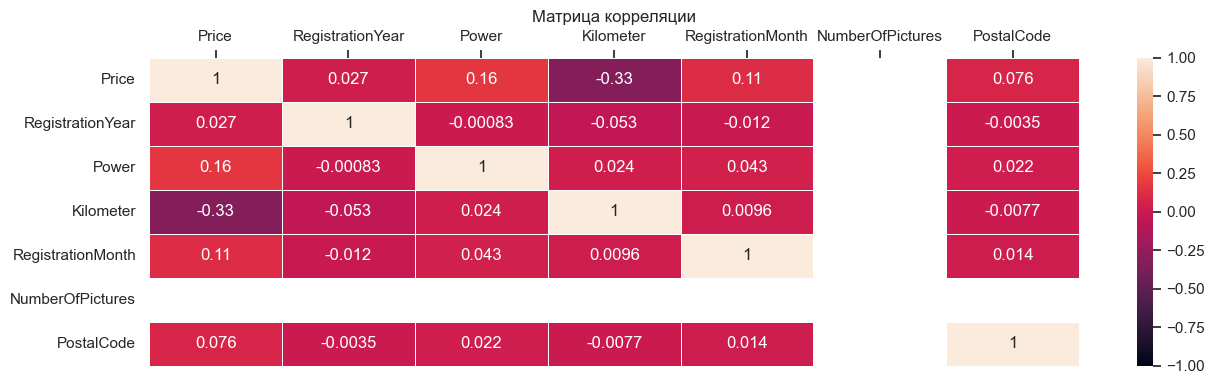

In [7]:
corr_matrix = data.select_dtypes(include=["int", "float"]).corr()

sns.set_theme(style="white")
plt.figure(figsize = (15, 4))
sns.heatmap(corr_matrix,
            vmin=-1, 
            vmax=1,
            annot=True,
            linewidths=.5
           ).xaxis.tick_top()
plt.title("Матрица корреляции")
plt.show()

del corr_matrix

Устраним некоторые признаки с датами. Также следующие признаки: почтовый индекс, месяц регистрации авто, количество фотографий (данные полностью отсутствуют).

In [8]:
data_filtered = data.drop(["DateCrawled", "RegistrationMonth", "DateCreated", "NumberOfPictures", "PostalCode", "LastSeen"], axis=1)
data_filtered = data_filtered.drop_duplicates().reset_index(drop=True)

Проанализируем пропуски.

In [9]:
print("Размер датасета с пропусками:", data.shape[0])
print("Размер датасета при устранении пропусков:", data.dropna().shape[0])
print("Доля пропусков составляет:", round(100-data.dropna().shape[0]/data.shape[0]*100, 2))

Размер датасета с пропусками: 354369
Размер датасета при устранении пропусков: 245814
Доля пропусков составляет: 30.63


Пропуски составляют порядка 30% от генеральной выборки, удаление пропусков в данном случае не самое эффективное решение проблемы.

In [10]:
for col in ["VehicleType", "Gearbox", "FuelType"]: 
    # для данных признаков логичнее использовать моду 
    # для заполения пропусков 
    data_filtered[col].fillna(data_filtered[col].mode()[0], inplace=True)

# для данных признаков логичнее использовать новую категорию "unknown"
data_filtered["Repaired"] = data_filtered["Repaired"].fillna("unknown")
data_filtered["Model"] = data_filtered["Model"].fillna("unknown")

data_filtered.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

Пропуски устранены, изучим распределение данных.

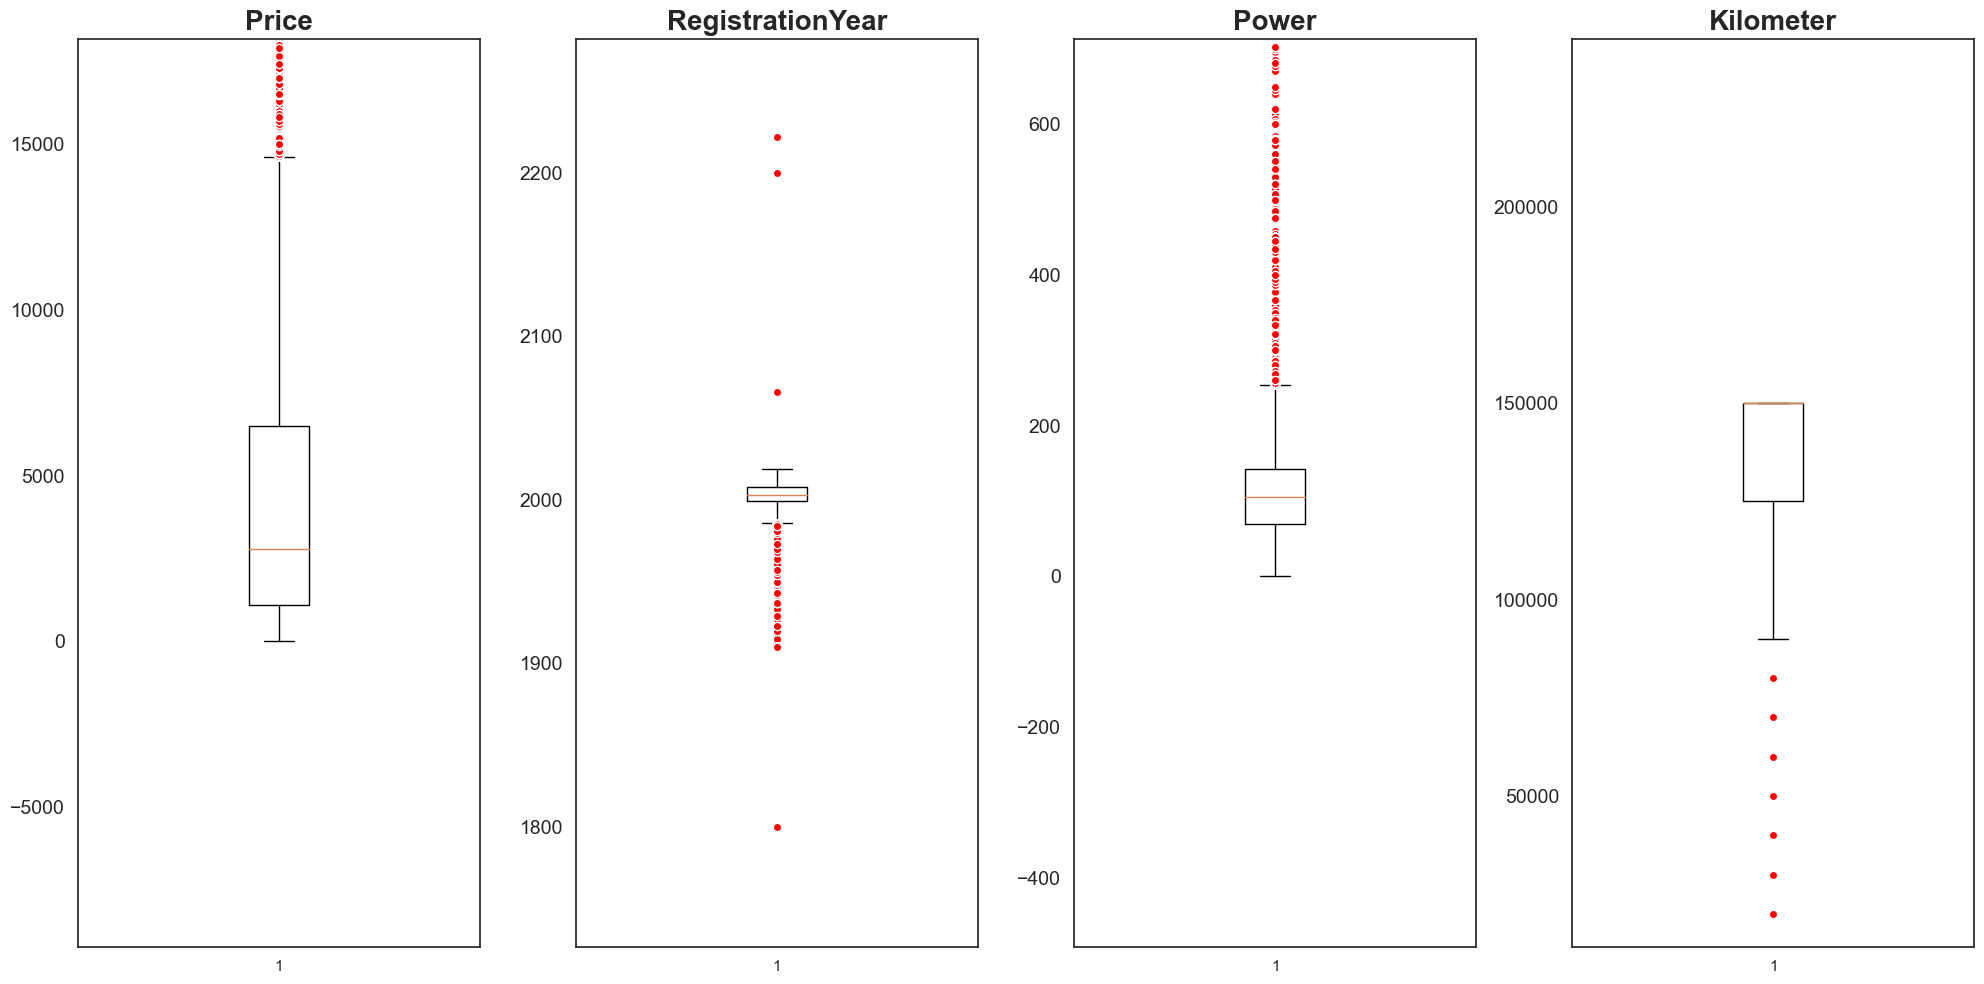

In [11]:
data_box = data_filtered.select_dtypes(include=int)

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(data_box.columns), figsize=(20, 10))

for i, ax in enumerate(axs):
    ax.boxplot(data_box.iloc[:, i], flierprops=red_circle)
    ax.set_title(data_box.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
    ax.set_ylim(data_box.iloc[:, i].mean() - 3 * data_box.iloc[:, i].std(), 
                data_box.iloc[:, i].mean() + 3 * data_box.iloc[:, i].std())

plt.tight_layout()

del data_box

Во всех признаках отмечаются выбросы, однако, к обработке подлежат не все признаки, кроме пробега, который может принимать разное значение.

За какой промежуток времени представлены анкеты?

In [12]:
np.sort(data["DateCrawled"])

array(['2016-03-05 14:06:22', '2016-03-05 14:06:23',
       '2016-03-05 14:06:24', ..., '2016-04-07 14:36:55',
       '2016-04-07 14:36:56', '2016-04-07 14:36:58'], dtype=object)

Все анкеты скачаны из базы в 2016 году, значит год регистрации авто выше 2016 это аномалия, как и самая ранняя регистрация, состаявшаяся в 1000 году.

- Цена авто не может равнятся 0;
- Мощность авто ограничим 2 000 л.с;
- Год регистрации авто ограничим в промежутке от 1950 до 2016 года.

In [13]:
data_filtered = data_filtered[(data_filtered["RegistrationYear"] > 1949) & (data_filtered["RegistrationYear"] < 2017)]
data_filtered = data_filtered[(data_filtered["Price"] > 0) & (data_filtered["Power"] < 2000)]

In [14]:
print("Размер генеральной выборки с пропусками и анамальными значениями:", data.shape[0])
print("Размер выборки после устранения пропусков, аномалий:",data_filtered.shape[0])
print("Доля устраненных пропусков и аномалий составил:", round(100-data.dropna().shape[0]/data_filtered.shape[0]*100, 2))

Размер генеральной выборки с пропусками и анамальными значениями: 354369
Размер выборки после устранения пропусков, аномалий: 287229
Доля устраненных пропусков и аномалий составил: 14.42


In [15]:
del data

Возможные потери сократили вдовое.

**Выводы**

По итогам предобработки данных:
- устранили неинформативные признаки;
- устранили пропуски и дубликаты;
- устранили аномалии.

[В начало](#intro)

## Бэггинг. RandomForestRegressor

Перед обучением:
- Скалируем количественные признаки;
- Приведем категориальные признаки к числовому представлению.

In [16]:
X = data_filtered.drop("Price", axis=1)
y = data_filtered.Price

encoder = OrdinalEncoder()
scaler = StandardScaler()

X[X.select_dtypes(include="object").columns] = encoder.fit_transform(X[X.select_dtypes(include="object").columns])
X[X.columns] = scaler.fit_transform(X[X.columns])

X.head(2)

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,-0.110785,-1.392065,0.493683,-1.536306,0.009424,0.597802,0.650906,1.314413,0.886724
1,-1.082554,1.206886,0.493683,1.121687,1.525566,-0.056690,-1.557960,-1.486520,2.371882


Разобъем данные на тренировочную и тестовую.

In [17]:
state = 12345

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215421, 9)
(215421,)
(71808, 9)
(71808,)


In [18]:
del X, y

Обучим модель бэггинга **RandomForestRegressor**, используем два гипераметра *max_depth* и *n_estimators*, подберем для этого разные значения.

In [19]:
%%time  
# подсчитаем время подбора наилучшей комбинации гиперпараметров

RFR = RandomForestRegressor(random_state=state)

params = {"max_depth": np.arange(1, 10),
          "n_estimators": [10, 30, 50]
         }

RFR = GridSearchCV(estimator=RFR, 
                   param_grid=params,
                   scoring="neg_root_mean_squared_error", # будем искать лучшее значение по RMSE
                   n_jobs = -1) 

RFR.fit(X_train, y_train)

print(f"rmse_train:{(RFR.best_score_*-1)}") # посчитаем RMSE на тренировочном датасете

rmse_train:2020.4427358912617
CPU times: user 13.4 s, sys: 521 ms, total: 13.9 s
Wall time: 2min 25s


Наша целевая метрика RMSE, она должна быть ниже 2500, модель случайного леса с задачей справилась на тренировочном датасете.

In [20]:
print("Лучшие параметры:")
RFR.best_estimator_.get_params()

Лучшие параметры:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

Инциализруем модель с лучшей комбинацией значений гиперпараметров по результатам подбора.

In [21]:
RFR = RandomForestRegressor(**RFR.best_estimator_.get_params())

Обучим модель и посмотрим на время обучения.

In [22]:
%%time
RFR.fit(X_train, y_train)
print("Время обучения модели:")

Время обучения модели:
CPU times: user 12.8 s, sys: 61 ms, total: 12.9 s
Wall time: 12.9 s


На первый взгляд обучилась модель быстро, однако, пока сравнивать несчем. Идем дальше.

In [23]:
%%time
y_pred = RFR.predict(X_test)
print("Время предсказания модели:")

Время предсказания модели:
CPU times: user 273 ms, sys: 6.33 ms, total: 279 ms
Wall time: 278 ms


Время предсказания модели достаточно короткое.

In [24]:
print("Качество предсказания модели:")
print(f"r2_train: {RFR.score(X_train, y_train)}")
print(f"r2_test: {RFR.score(X_test, y_test)}")
print(f"rmse_test: {mean_squared_error(y_pred, y_test, squared=False)}")

Качество предсказания модели:
r2_train: 0.8154612862128906
r2_test: 0.804516017905271
rmse_test: 2029.6462164749266


Модель практически не переобучилась.

[В начало](#intro)

## Градиентный бустинг

Прежде чем использовать модели бустинга, попробуем создать свою модель градиентного бустинга.

### GradientBoostingHand - ручная модель

In [25]:
class GradientBoostingHand:
    def __init__(self, learning_rate=0.5, n_estimators=100, max_depth = 2, random_state=12345): # указываем дефолтные значения гиперпараметров
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.max_depth = max_depth
    
    def mae_gradient(self, y_true, y_pred): # функция потерь MAE
        return y_true - y_pred              # градиент функции
    
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        self.y_base = np.mean(self.y) * np.ones(self.X.shape[0]) # инициализируем базовую модель
        self.y_pred = self.y_base 
        
        self.trees = [] # создаем список для наших деревьев

        for i in range(self.n_estimators):  # градиентным спуском обучаем деревья
            gradient = self.mae_gradient(y, self.y_pred) # находим градиент
            DTR = DecisionTreeRegressor(random_state=self.random_state, max_depth=self.max_depth) # инциализируем модель
            DTR.fit(X, gradient) # обучаем на градиенте
            self.trees.append(DTR) # складываем в наш пустой список дерево
            self.y_pred += self.learning_rate * DTR.predict(X) # обновим наши предсказания
    
    def predict(self, X): # делаем предсказания 
        pred = np.ones(X.shape[0]) * np.mean(self.y)
        
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        
        return pred

In [26]:
GBH = GradientBoostingHand()

Обучим модель, посмотрим на время обучения.

In [27]:
%%time
GBH.fit(X_train, y_train)
print("Время обучения модели:")

Время обучения модели:
CPU times: user 10.9 s, sys: 464 ms, total: 11.4 s
Wall time: 11.4 s


Наша модель обучилась чуть быстрее, чем модель RandomForestRegressor.

In [28]:
%%time
y_pred = GBH.predict(X_test)
print("Время предсказания модели:")

Время предсказания модели:
CPU times: user 206 ms, sys: 73.7 ms, total: 279 ms
Wall time: 278 ms


Предсказания также чуть быстрее чем на RandomForestRegressor

In [29]:
print("Качество предсказания модели:")
print(f"r2_train: {r2_score(GBH.predict(X_train), y_train)}")
print(f"r2_test: {r2_score(y_pred, y_test)}")
print(f"rmse_test: {mean_squared_error(y_pred, y_test, squared=False)}")

Качество предсказания модели:
r2_train: 0.786846527441476
r2_test: 0.7833836754496912
rmse_test: 1934.4502451356245


Наша модель практически не переобучилась, метрики при этом ниже модели бэггинга. 

[В начало](#intro)

### CatBoostRegressor

Для производительности вычислений используем встроенную структуру CatBoost - Pool.

In [30]:
train_data = Pool(X_train, y_train)
test_data = Pool(X_test, y_test)

In [31]:
%%time 
params = {                           # создадим сетку гиперпараметров и их значений для поиска
    "iterations": [20, 40, 60, 80],  # используем количество деревьев 
    "depth": [4, 6, 8]               # и глубину
}

CBR = CatBoostRegressor(loss_function="RMSE",  # функция потерь RMSE
                        logging_level="Silent",
                        random_state=state)

CBR = GridSearchCV(estimator=CBR, 
                   param_grid=params,
                   n_jobs=-1, 
                   scoring="neg_root_mean_squared_error") # прогон по RMSE, сетка вернет модель с гиперпараметрами, которые дали наименьший RMSE

CBR.fit(X_train,y_train)

print(f"rmse_train: {CBR.best_score_*-1}") # посчитаем RMSE на обучающих данных 

rmse_train: 1718.4327641947334
CPU times: user 4.62 s, sys: 756 ms, total: 5.38 s
Wall time: 23.1 s


Модель показывает очень хорошее значение метрики RMSE.

In [32]:
print("Лучшие параметры:")
CBR.best_estimator_.get_params()

Лучшие параметры:


{'iterations': 80,
 'depth': 8,
 'loss_function': 'RMSE',
 'logging_level': 'Silent',
 'random_state': 12345}

Наши лучшие значения гиперпараметров. Обучим ими нашу новую модель.

In [33]:
CBR = CatBoostRegressor(**CBR.best_estimator_.get_params())

In [34]:
%%time
CBR.fit(train_data, plot=True)
print("Время обучения модели:")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Время обучения модели:
CPU times: user 4.65 s, sys: 603 ms, total: 5.26 s
Wall time: 1.05 s


Модель обучилась довольно быстро, за первые 6 итераций модель значительно снизила значение RMSE. 

In [35]:
%%time
y_pred = CBR.predict(X_test)
print("Время предсказания модели:")

Время предсказания модели:
CPU times: user 31.9 ms, sys: 3.38 ms, total: 35.3 ms
Wall time: 10.6 ms


Скорость предсказания на высоте.

In [36]:
print("Качество предсказания модели:")
print(f"r2_train: {CBR.score(train_data)}")
print(f"r2_test: {CBR.score(test_data)}")
print(f"rmse_test: {mean_squared_error(y_pred, y_test, squared=False)}")

Качество предсказания модели:
r2_train: 0.8739504681985321
r2_test: 0.8608144036840369
rmse_test: 1712.6235125063245


Модель практически не переобучилась, метрика хорошая. 

[В начало](#intro)

### LGBMRegressor

Обучим еще одну модель градиентного бустинга - **LGBMRegressor.**

In [37]:
%%time

params = {                            #  создадим сетку
    "learning_rate": [0.1, 0.2, 0.3], #  используем шаг обучения
    "num_leaves": [20, 30, 40]        #  листья в деревьях
}

LGB = LGBMRegressor(verbose=-100, silent=True, random_state=state)

LGB = GridSearchCV(estimator=LGB, 
                   param_grid=params,
                   n_jobs=-1, 
                   scoring="neg_root_mean_squared_error")

LGB.fit(X_train,y_train)

print(f"rmse_train:{LGB.best_score_*-1}")

rmse_train:1697.602596478558
CPU times: user 3.3 s, sys: 450 ms, total: 3.75 s
Wall time: 45.7 s


На обучающих данных модель показывают самые лучшее значение целевой метрики.

In [38]:
print("Лучшие параметры:")
LGB.best_estimator_.get_params()

Лучшие параметры:


{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.3,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 40,
 'objective': None,
 'random_state': 12345,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -100,
 'silent': True}

Инциализируем новую модель с лучшими параметрами по итогам поиска.

In [39]:
LGB = LGBMRegressor(**LGB.best_estimator_.get_params())

In [40]:
%%time
LGB.fit(X_train,y_train)
print("Время обучения модели:")

Время обучения модели:
CPU times: user 3.36 s, sys: 508 ms, total: 3.86 s
Wall time: 526 ms


In [41]:
%%time
y_pred = LGB.predict(X_test)
print("Время предсказания модели:")

Время предсказания модели:
CPU times: user 829 ms, sys: 42.6 ms, total: 872 ms
Wall time: 119 ms


In [42]:
print("Качество предсказания модели:")
print(f"r2_train: {LGB.score(X_train,y_train)}")
print(f"r2_test: {LGB.score(X_test,y_test)}")
print(f"rmse_test: {mean_squared_error(y_pred, y_test, squared=False)}")

Качество предсказания модели:
r2_train: 0.8795647319828529
r2_test: 0.8644246466544125
rmse_test: 1690.2662793029165


Качество метриики самое лучшее, однако время обучения и предсказания по сравнению с CatBoost.

[В начало](#intro)

## Анализ моделей

In [43]:
col = ["r2_train","r2_test", "rmse_test", "learn_time", "predict_time"] 

result = {
    "RandomForestRegressor": [ 0.815, 0.804,  2029.64, "12.9 s","275 ms"],
    "GradientBoostingHand": [0.786, 0.783, 1934.45, "11.3 s","257 ms"],
    "CatBoostRegressor": [0.873, 0.860, 1712.62, "1.04 s", "11.7 ms"],
    "LGBMRegressor": [0.879, 0.864, 1690.26, "618 ms", "114 ms"]
}

pd.DataFrame(result, index=col).T

,r2_train,r2_test,rmse_test,learn_time,predict_time
RandomForestRegressor,0.815,0.804,2029.64,12.9 s,275 ms
GradientBoostingHand,0.786,0.783,1934.45,11.3 s,257 ms
CatBoostRegressor,0.873,0.86,1712.62,1.04 s,11.7 ms
LGBMRegressor,0.879,0.864,1690.26,618 ms,114 ms


Худшей моделью в нашем анализе является модель бэггинга - RandomForestRegressor. Значение метрики r2 выше, чем у нашей ручной модели GradientBoostingHand, однако значение метрики rmse на тестовой выборке на порядок выше. Также самый длительное обучение и предсказание у модели случайного леса. Но и наша ручная модель далеко не лучшая. Первое место делят между собой модели грфдиентного бустинга CatBoostRegressor и LGBMRegressor. У CatBoostRegressor качество предсказания чуть ниже, чем LGBMRegressor, но скорость предсказания значительно быстрее. 

Заказчику важны:
- качество предсказания;
- скорость предсказания;
- время обучения.

Ответ на вопрос какую модель использовать требует уточнений. Если для заказчика важнее скорость работы модели при относительно высоких показателях качества то, следует выбрать CatBoostRegressor, если же для заказчика важнее качество предсказания модели при относительно хорошей скорости работы модели, то следует выбрать LGBMRegressor.

Сохраним обученную модель.

In [44]:
# CBR.save_model("catboost_model.json")
# CBR.save_model("catboost_model.bin")

[В начало](#intro)

## Выводы

В ходе работы было выполнено:
- Преобработка данных;
- Исследовательский анализ данных;
- Обучена и оценена модель бэггинга для решения задачи;
- Разработана и оценена собственная модель градиентного бустинг;
- Обучены и оценены классические модели градиентного бустинга;
- Предложена модель для решения задачи заказчика.

[В начало](#intro)